In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

%matplotlib inline

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10,6)
sns.set(style="whitegrid")

In [2]:
subastas = pd.read_csv('C:/Users/emcruz/datos/tp-2019-organizacion-de-datos/auctions.csv.gzip',compression='gzip' ,low_memory=False,parse_dates=[2])

In [86]:
subastas['fecha'] = pd.to_datetime(subastas['date'].dt.date)
subastas['hora'] = subastas['date'].dt.hour

In [116]:
def graficarPorHora(subastas,titulo='Subastas por hora'):
    grafico=subastas.groupby('hora')['date'].count().plot(figsize=(16,8),fontsize=14,kind='bar')
    grafico.set_title(titulo)
    grafico.set_xlabel('hora',fontsize=14)
    grafico.set_ylabel('Cantidad de subastas',fontsize=14)
    
def graficarPorFecha(subastas,titulo,label_x,label_y):
    grafico=subastas.groupby('fecha')['date'].count().plot(figsize=(16,8),fontsize=14,kind='bar')
    grafico.set_title(titulo,fontsize=20)
    grafico.set_xlabel(label_x,fontsize=14)
    grafico.set_ylabel(label_y,fontsize=14)

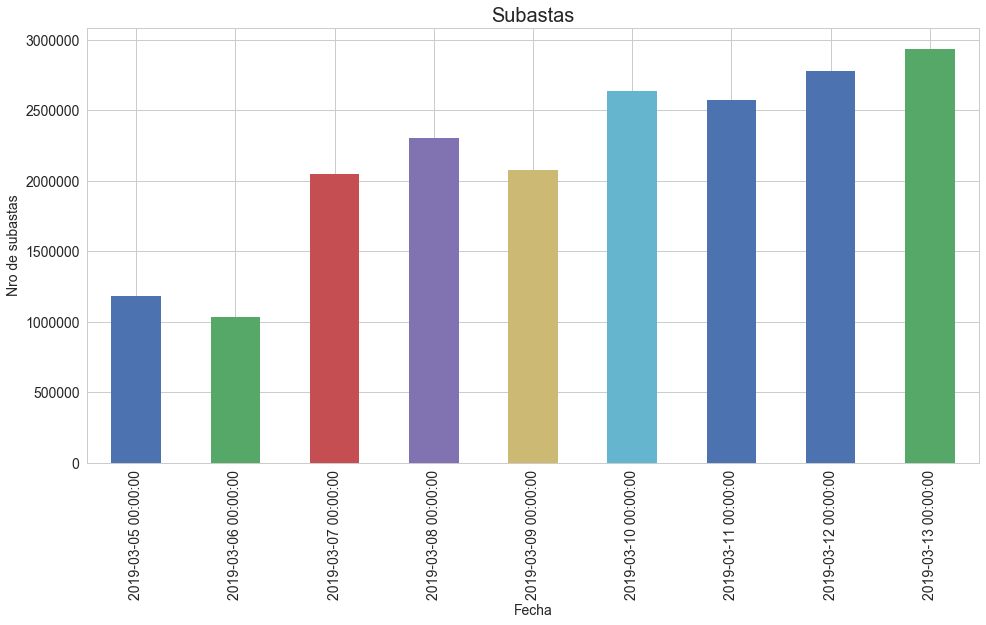

In [98]:
graficarPorFecha(subastas,'Subastas','Fecha','Nro de subastas')

In [112]:
fechaMayorSubastas=pd.Timestamp('2019-03-13')
fechaMedioSubastas=pd.Timestamp('2019-03-08')
fechaMenorSubastas=pd.Timestamp('2019-03-06')
fecha_con_mas_subastas = subastas[subastas['fecha']==fechaMayorSubastas]
fecha_con_menos_subastas = subastas[subastas['fecha']==fechaMenorSubastas]
fecha_media_subastas = subastas[subastas['fecha']==fechaMedioSubastas]

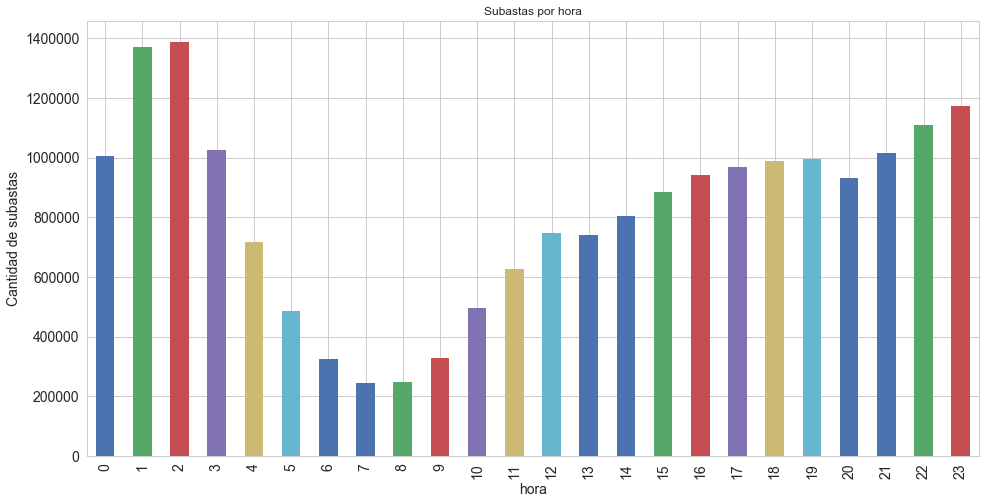

In [106]:
graficarPorHora(subastas)

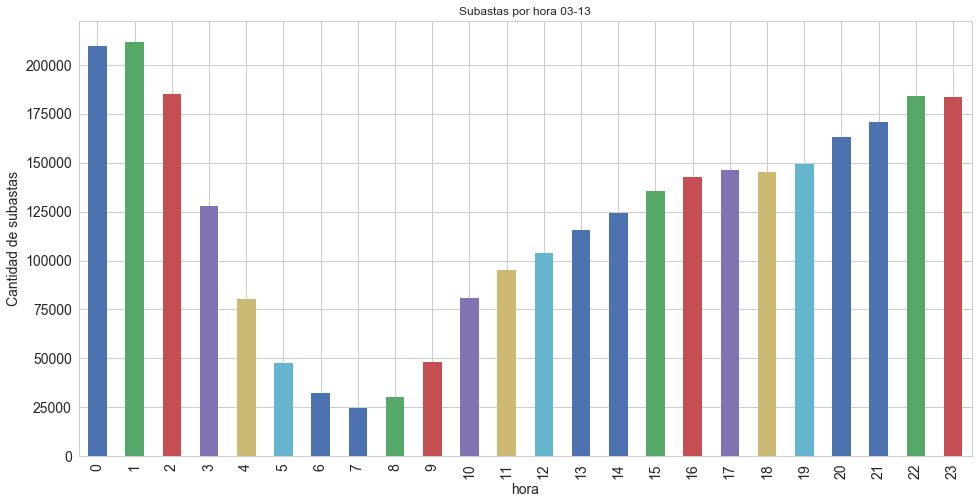

In [118]:
graficarPorHora(fecha_con_mas_subastas,'Subastas por hora 03-13')

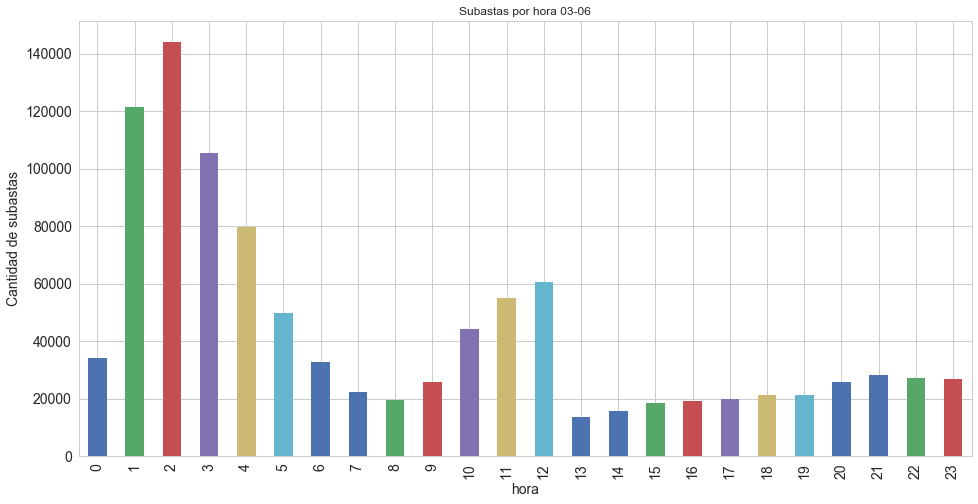

In [119]:
graficarPorHora(fecha_con_menos_subastas,'Subastas por hora 03-06')

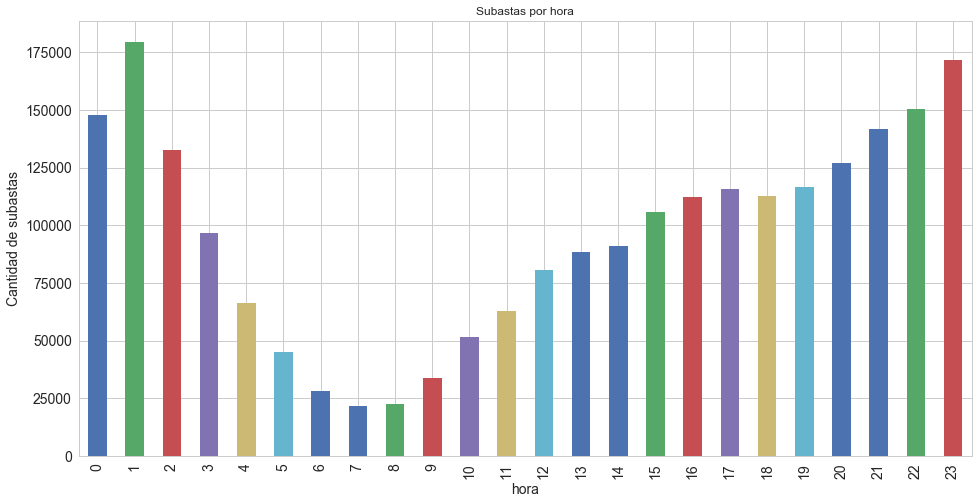

In [115]:
graficarPorHora(fecha_media_subastas)

In [121]:
device_subastas=subastas.groupby('device_id').count().sort_values(by='fecha',ascending=True)

In [122]:
device_mas_subastas=device_subastas.tail(10)
device_menos_subastas=device_subastas.head(10)

Text(0,0.5,'Cantidad de subastas')

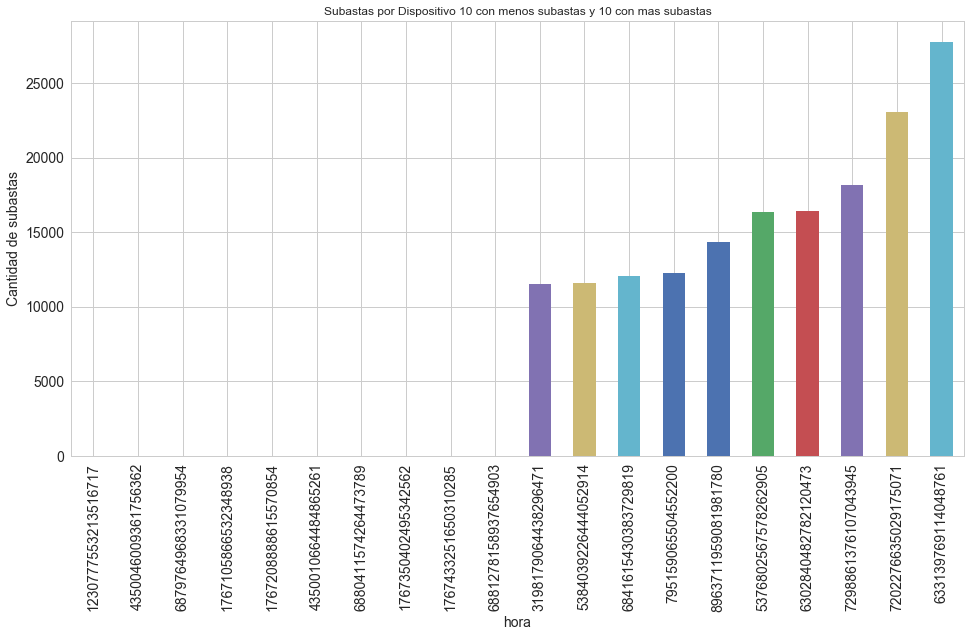

In [125]:
grafico=pd.concat([device_menos_subastas,device_mas_subastas])['fecha'].plot(figsize=(16,8),fontsize=14,kind='bar')
grafico.set_title('Subastas por Dispositivo 10 con menos subastas y 10 con mas subastas')
grafico.set_xlabel('hora',fontsize=14)
grafico.set_ylabel('Cantidad de subastas',fontsize=14)

In [58]:
primero=633139769114048761
segundo=7202276635029175071
tercero=7298861376107043945

In [79]:
subastas_primero=subastas[subastas['device_id']==primero]
subastas_segundo=subastas[subastas['device_id']==segundo]
subastas_tercero=subastas[subastas['device_id']==tercero]

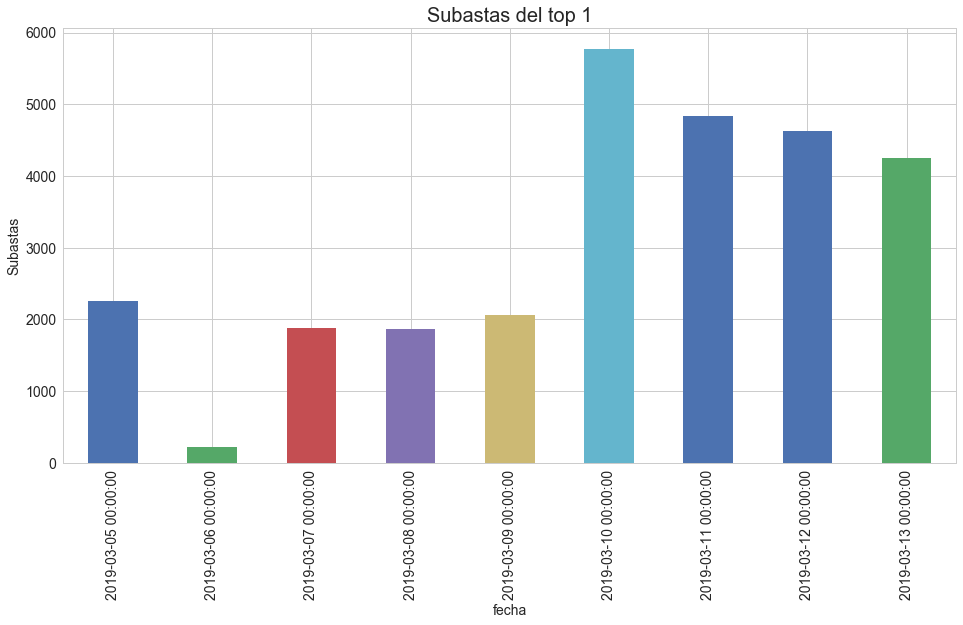

In [92]:
graficarPorFecha(subastas_primero,'Subastas del top 1','fecha','Subastas')

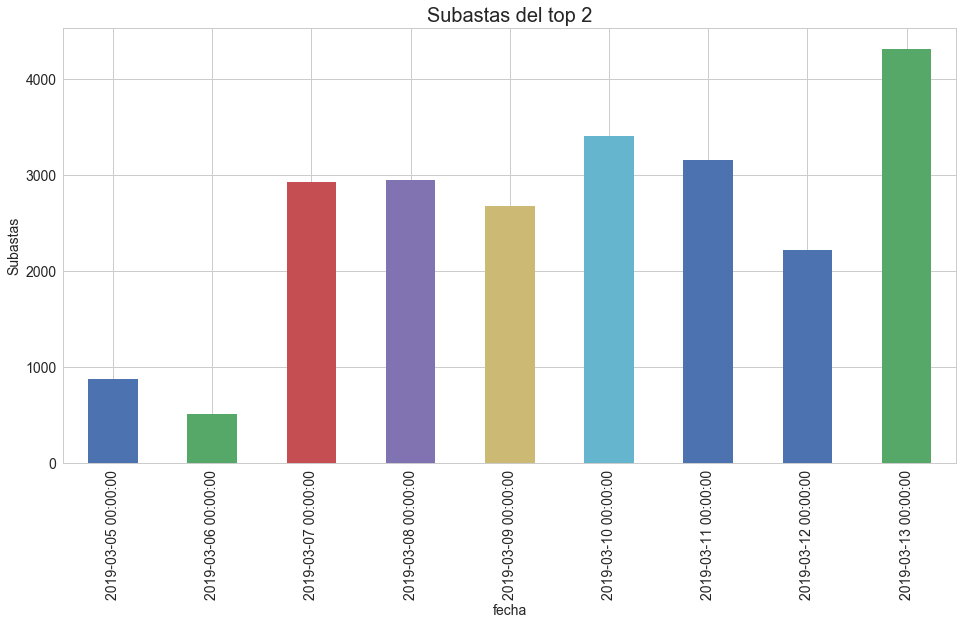

In [82]:
graficarPorFecha(subastas_segundo.groupby('fecha').count(),'Subastas del top 2','fecha','Subastas')

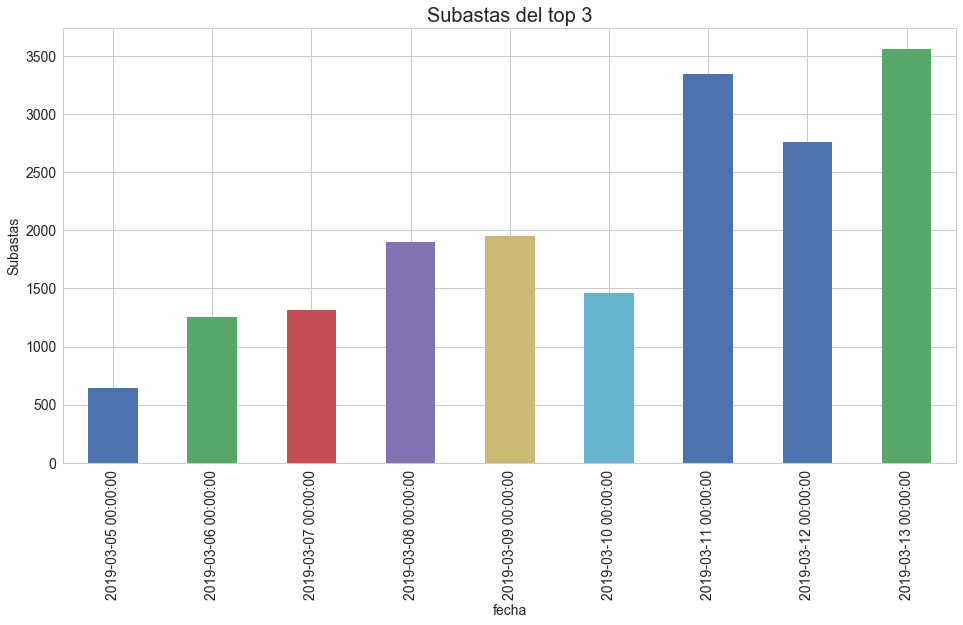

In [83]:
graficarPorFecha(subastas_tercero.groupby('fecha').count(),'Subastas del top 3','fecha','Subastas')

Text(0,0.5,'subastas')

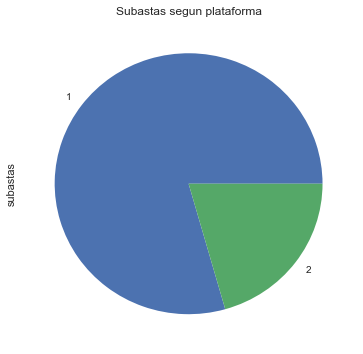

In [161]:
grafico=subastas.groupby('platform')['date'].count().plot(kind='pie',figsize=(6,6))
grafico.set_title('Subastas segun plataforma')
grafico.set_ylabel('subastas')